<a href="https://colab.research.google.com/github/assaultkiddy-glitch/assaultkiddy-glitch/blob/main/24BDS004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, confusion_matrix, roc_curve, auc
)

In [ ]:
df = pd.read_csv("dataset_phishing.csv")

print("✔ Dataset Loaded Successfully!\n")
print(df.head())

✔ Dataset Loaded Successfully!

                                                 url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_registered_domain  \
0 

In [ ]:
X = df.drop("status", axis=1)
y = df["status"]

numeric_cols = X.select_dtypes(include=['int64','float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [ ]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

In [ ]:
model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42))
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
model.fit(X_train, y_train)
print("\n✔ Model Training Completed!")


✔ Model Training Completed!


In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# Determine the index for the 'phishing' class
# Assuming model.classes_ contains the ordered labels, e.g., ['legitimate', 'phishing']
phishing_class_idx = list(model.classes_).index('phishing')
y_prob_phishing = y_prob[:, phishing_class_idx]

print("\n============= MODEL PERFORMANCE ============")
print("Accuracy  :", accuracy_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred, pos_label='phishing'))
print("Recall    :", recall_score(y_test, y_pred, pos_label='phishing'))
print("ROC-AUC   :", roc_auc_score(y_test, y_prob_phishing))
print("==============================================\n")


============= MODEL PERFORMANCE ============
Accuracy  : 0.9667541557305337
Precision : 0.9713518352730528
Recall    : 0.9610274579273693
ROC-AUC   : 0.9937925501415116



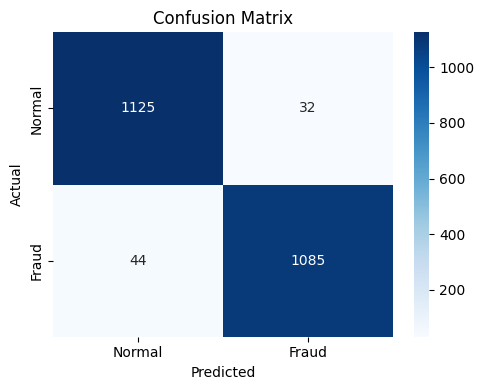

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Normal", "Fraud"],
            yticklabels=["Normal", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

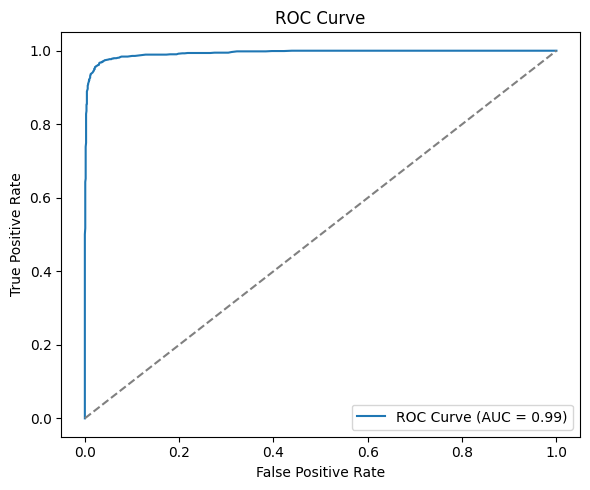

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_phishing, pos_label='phishing')
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()

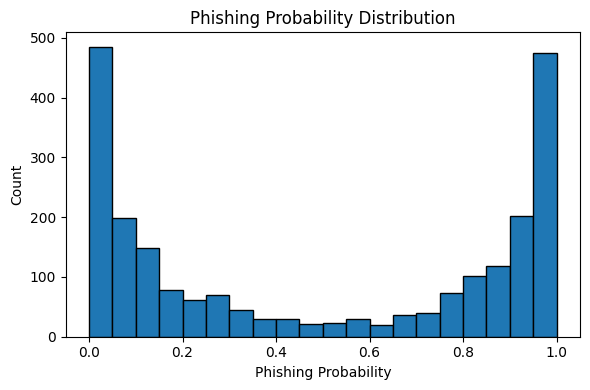

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(y_prob_phishing, bins=20, edgecolor="black")
plt.title("Phishing Probability Distribution")
plt.xlabel("Phishing Probability")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
# Create a sample DataFrame by taking a copy of the first row of X
# This ensures all columns are present and in the correct order/type initially
sample = X.iloc[[0]].copy()

# Now, modify the values of this sample DataFrame as desired
# For example, let's create a sample that might represent a phishing URL
new_url = 'http://evil-phishing-site.com/login.php'
sample['url'] = new_url

# Update other related features based on the new URL (these are just examples)
sample['length_url'] = len(new_url)
sample['length_hostname'] = len('evil-phishing-site.com')
sample['nb_dots'] = new_url.count('.')
sample['nb_hyphens'] = new_url.count('-')
sample['ip'] = 0 # Assuming no IP address in this example URL
sample['nb_at'] = new_url.count('@')
sample['nb_qm'] = new_url.count('?')
sample['nb_slash'] = new_url.count('/')
sample['nb_dslash'] = new_url.count('//')
sample['http_in_path'] = 0 # Assuming 'http' is not in path for this example
sample['https_token'] = 0 # Not an https URL

# You can modify other features as needed to test different scenarios.
# For now, the remaining features will retain their values from the first row of X.

# Display the created sample DataFrame
print("✔ Sample DataFrame created successfully!")
display(sample)

# Now attempt prediction with the corrected sample
pred = model.predict(sample)[0]
prob = model.predict_proba(sample)[0][phishing_class_idx] # Use phishing_class_idx to get the correct probability

print("\n=== SAMPLE PREDICTION ===")
print("Phishing Prediction :", pred)
print("Phishing Probability:", prob)


✔ Sample DataFrame created successfully!


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,http://evil-phishing-site.com/login.php,39,22,0,2,2,0,0,0,0,...,0,0,1,0,45,-1,0,1,1,4



=== SAMPLE PREDICTION ===
Phishing Prediction : legitimate
Phishing Probability: 0.425


In [ ]:
print("\n=== SAMPLE PREDICTION ===")
print("Phishing Prediction :", pred)
print("Phishing Probability:", prob)


=== SAMPLE PREDICTION ===
Phishing Prediction : legitimate
Phishing Probability: 0.425
